# Housing - exploratory data analysis (EDA)

NYC housing dataset b/w in 2012-13, seperated by boroughs

- [x] get an intuitive understanding, 
- [x] clear data
- [x] set columns data types
- [x] adjust columns
- [x] enrich
- [x] then **create an OUTPUT file for other models**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import decimal

sns.set()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)


In [10]:
# read all datasets w/ dates

raw_data = pd.read_csv('dataset/housing/rollingsales_manhattan.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_bronx = pd.read_csv('dataset/housing/rollingsales_bronx.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_brooklyn = pd.read_csv('dataset/housing/rollingsales_brooklyn.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_queens = pd.read_csv('dataset/housing/rollingsales_queens.csv', parse_dates=['SALE DATE'], infer_datetime_format=True)
raw_data_statenisland = pd.read_csv('dataset/housing/rollingsales_statenisland.csv', parse_dates=['SALE DATE'],  infer_datetime_format=True)

# conembine all into 1
raw_data = raw_data.append([raw_data_bronx, raw_data_brooklyn, raw_data_queens, raw_data_statenisland], 
                           ignore_index=True)

# change column names
raw_data.columns = ['borough', 'neighborhood', 'building_class_category',
                    'tax_class_at_present', 'block', 'lot', 'easement',
                    'building_class_at_present', 'address', 'apartment_number',
                    'zipcode', 'residential_units', 'commercial_units', 'total_units',
                    'land_square_feet', 'gross_square_feet', 'year_built',
                    'tax_class_at_sale', 'building_class_at_sale',
                    'sale_price', 'sale_date']

# map and extract some of them, delete white-spaces, delete ',' from number columns
raw_data['borough_name'] = raw_data['borough'].map({1:'Manhattan', 3:'Brooklyn', 
                                                    2:'Bronx', 4:'Queens', 
                                                    5:'Staten Island'})   

for col in ('neighborhood', 'apartment_number', 'residential_units', 'commercial_units', 'total_units'):
    raw_data[col] = raw_data[col].str.split(r'(\s+)$|,', expand=True)[0]
    

raw_data['address'] = raw_data['address'].str.split(r'(^\s)|(\s+)$', expand=True)[3]

raw_data['building_class'] = raw_data['building_class_category'].str.split(r'(^\s)|(\s+)$', expand=True)[0] \
                                                                .str.split(r'(^\S+)(\s+){1}', expand=True)[1]

raw_data['building_class_name'] = raw_data['building_class_category'].str.split(r'(^\s)|(\s+)$', expand=True)[0] \
                                                                     .str.split(r'(^\S+)(\s+){1}', expand=True)[3]


for col in ('land_square_feet', 'gross_square_feet'):
    raw_data[col] = raw_data[col].str.replace(r',', '').astype(int)
    

raw_data['sale_price'] = raw_data['sale_price'].str.replace(r',|\$', '').astype(float)
raw_data['currency'] = 'USD'
    
# change column names' order
raw_data = raw_data[['borough', 'borough_name' , 'neighborhood',
                     'building_class_category', 'building_class', 'building_class_name',
                     'tax_class_at_present', 'tax_class_at_sale', 
                     'block', 'lot', 'easement','building_class_at_present', 'building_class_at_sale', 
                     'address', 'apartment_number','zipcode',
                     'residential_units', 'commercial_units', 'total_units',
                     'land_square_feet', 'gross_square_feet', 
                     'year_built','sale_date', 'sale_price', 'currency']]



# possible deletion columns: 
#   1- borough, building_class_category .. (extracted into diff. columns)
#   2- block, lot (nonsense)
#   3- easement (%100 empty), 
#   4- apartment_number (%74 empty)
#   5- 50% of estates has 0 land_square_feet
#   5- 50% of estates has 0 gross_square_feet

# domain knowledge 
#  1- building_class_at_present: may be mapped into 3 groups to use later ?
#  2- building_class_at_present vs building_class_at_sale change has any meaning?
#  3- tax_class_at_present vs tax_class_at_sale has any meaning? (1, 2 and 4 is dominating values)
#  4- 10019 zipcode is %7 of houses, and 70K houses are located in of 100 zipcodes
#  5- 50% of estates has 0 land_square_feet and gross_square_feet. can be groupped into less categories?
#  6- 4000+ diff. apartment_number in 85K rows.
#  7- residential_units (165 types), %50 is 0 and 1 (40K+ rows) and 30K+ NaN. can be grouped into less categories?
#  8- commercial_units (23 types), 0 has 20K+, NaN is 60K+
#  9- can residential_units and commercial_units be used meaningful dummy column?
#  10- total_units (171 types), 1 (25K+, 0 (16K+), 2 (8K+) and NaN is 30K
#     - total = residental + commercial ?
#     - if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
#     - if total = 0 , what we should do?

raw_data.head()

# save as a new file output for model usage !!!!

,borough_name,neighborhood,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,currency
0,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1306,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-20,2214693.0,USD
1,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1307,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-16,1654656.0,USD
2,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1308,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-23,1069162.0,USD
3,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1309,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-15,1374637.0,USD
4,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1310,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-13,1649565.0,USD


## Export OUTPUT file

In [ ]:
raw_data.drop(['borough', 'building_class_category', 'easement', 'apartment_number'], axis=1, inplace=True)

In [11]:
export_csv = raw_data.to_csv (r'./dataset/housing/real_estate_of_nyc_OUTPUT_of_EDA.csv', 
                        index = None, 
                        header = True) 

## Analysis

In [8]:
# faster way to delete

x = raw_data.drop(['borough', 'building_class_category'], axis=1, inplace=True)



In [9]:
raw_data.head(3)

,borough_name,neighborhood,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,currency
0,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1306,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-20,2214693.0,USD
1,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1307,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-16,1654656.0,USD
2,Manhattan,,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1308,,,R4,345 WEST 14TH STREET,,10014,0,NaN,0,0,0,0,2013-05-23,1069162.0,USD


In [570]:
kkk['address'] = raw_data['address'].head(100)

kkk['address_'] = kkk['address'].str.split(r'(^\s)|(\s+)$')

kkk.address_.head(10)

0    [345 WEST 14TH   STREET]
1    [345 WEST 14TH   STREET]
2    [345 WEST 14TH   STREET]
3    [345 WEST 14TH   STREET]
4    [345 WEST 14TH   STREET]
5    [345 WEST 14TH   STREET]
6    [345 WEST 14TH   STREET]
7    [345 WEST 14TH   STREET]
8    [345 WEST 14TH   STREET]
9    [345 WEST 14TH   STREET]
Name: address, dtype: object

#### discover fields and values

In [528]:
raw_data.dtypes

borough                               int64
borough_name                         object
neighborhood                         object
building_class_category              object
building_class                       object
building_class_name                  object
tax_class_at_present                 object
tax_class_at_sale                    object
block                                 int64
lot                                   int64
easement                             object
building_class_at_present            object
building_class_at_sale               object
address                              object
apartment_number                     object
zipcode                               int64
residential_units                    object
commercial_units                     object
total_units                          object
land_square_feet                      int64
gross_square_feet                     int64
year_built                            int64
sale_date                    dat

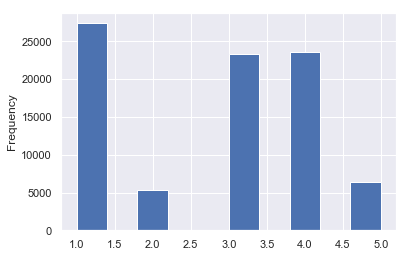

In [81]:
raw_data.borough.plot.hist()

In [404]:
# z = raw_data.groupby(raw_data.neighborhood).size()#.plot(kind='pie')

nbhd = raw_data
nbhd['neighborhood_'] = nbhd.neighborhood.str.split(r'(\s+)$', expand=True)[0]

nbhd[nbhd.neighborhood == 'SOUNDVIEW'].head(3)
# nbhd.neighborhood_.head(100)

# it had white-spaces at the end of 

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,neighborhood_
31489,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,120,,A2,A2,809 HARDING PARK,,10473,1,0,1,2620,780,1920,2012-10-10,"$175,000.00",SOUNDVIEW
31490,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,212,,A1,A1,602 HARDING PARK,,10473,1,0,1,2013,1916,1990,2013-06-17,"$175,000.00",SOUNDVIEW
31491,2,Bronx,SOUNDVIEW,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,1,1,3429,320,,A2,A2,408 HARDING PARK,,10473,1,0,1,3660,1595,1940,2013-02-27,$0.00,SOUNDVIEW


In [524]:
lsf = raw_data


# for col in ('land_square_feet', 'gross_square_feet'):
#     lsf[col+'_'] = lsf[col].str.replace(r',', '').astype(int)
    
# lsf[ (lsf.land_square_feet <= 500)].groupby('land_square_feet').size().sort_values(ascending=False).head()

lsf.groupby('land_square_feet').size().sort_values(ascending=False).head(10)



# %50 of houses has 0 square_feet

land_square_feet
0       40340
2000     3417
2500     3130
4000     2688
7532     1635
1800     1113
3000     1004
5000      927
2200      448
1600      448
dtype: int64

In [527]:
lsf[lsf.gross_square_feet <500].groupby('gross_square_feet').size().sort_values(ascending=False)

gross_square_feet
0      42780
300        9
400        8
1          6
480        5
100        4
476        4
450        4
150        3
200        3
360        3
448        3
468        2
350        2
420        2
464        2
264        2
487        2
415        2
112        1
120        1
142        1
253        1
172        1
80         1
205        1
216        1
488        1
425        1
320        1
324        1
336        1
340        1
492        1
375        1
396        1
432        1
402        1
403        1
405        1
416        1
495        1
dtype: int64

In [605]:
dddd = pd.DataFrame(raw_data['building_class_category'].head(100))


dddd['building_class_category_'] = dddd['building_class_category'].str.split(r'(^\s)|(\s+)$', expand=True)[0] \
                                                                  .str.split(r'(^\S+)(\s+){1}')

# 
# (^\S+)(\s+){1}

dddd.head(100)




,building_class_category,building_class_category_
0,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
1,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
2,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
3,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
4,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
5,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
6,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
7,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
8,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"
9,13 CONDOS - ELEVATOR APARTMENTS,"[, 13, , CONDOS - ELEVATOR APARTMENTS]"


In [458]:
raw_data.groupby('building_class_category').size().head(10)

# we should split this column into 2 pieces

building_class_category
                                                 4204
01  ONE FAMILY HOMES                            14846
02  TWO FAMILY HOMES                            13678
03  THREE FAMILY HOMES                           4135
04  TAX CLASS 1 CONDOS                           1251
05  TAX CLASS 1 VACANT LAND                      1230
06  TAX CLASS 1 - OTHER                           180
07  RENTALS - WALKUP APARTMENTS                  3989
08  RENTALS - ELEVATOR APARTMENTS                 581
09  COOPS - WALKUP APARTMENTS                    2600
dtype: int64

In [309]:
df = raw_data

df['building_class'] = df.building_class_category.str.split(n=1, expand=True)[0]
df['building_class_name'] = df.building_class_category.str.split(n=1, expand=True)[1].str.split(r'(\s+)$', expand=True)[0]

df['z'] = df.building_class_name.str.split(r'(\s+)$', expand=True)[0]

# df['building_class'] = x[0]
# df['building_class_category'] = x[1]

# k = df.groupby('building_class_name').size()
# df.z.head()

df[df.building_class_name == 'CONDOS - ELEVATOR APARTMENTS'].head()  # yeah - i cleaned unnecessary and hard to cath white-spaces :)

# k, k.plot(kind='bar')

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,z
0,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1306,,,R4,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2013-05-20,"$2,214,693",CONDOS - ELEVATOR APARTMENTS
1,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1307,,,R4,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2013-05-16,"$1,654,656",CONDOS - ELEVATOR APARTMENTS
2,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1308,,,R4,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2013-05-23,"$1,069,162",CONDOS - ELEVATOR APARTMENTS
3,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1309,,,R4,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2013-05-15,"$1,374,637",CONDOS - ELEVATOR APARTMENTS
4,1,Manhattan,,13 CONDOS - ELEVATOR APARTMENTS,13,CONDOS - ELEVATOR APARTMENTS,,2,738,1310,,,R4,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2013-05-13,"$1,649,565",CONDOS - ELEVATOR APARTMENTS


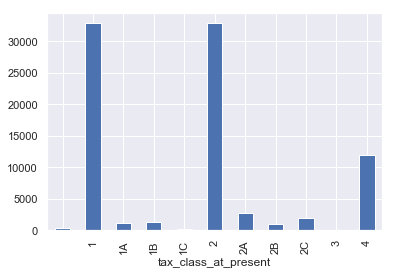

In [196]:

raw_data.groupby('tax_class_at_present').size().plot(kind='bar')

# 1, 2 and 4 is dominating tax_class_at....

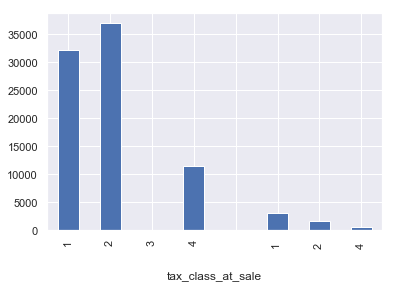

In [197]:
raw_data.groupby('tax_class_at_sale').size().plot(kind='bar')

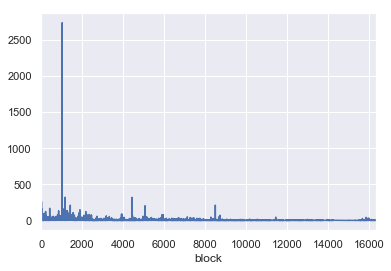

In [429]:
raw_data.groupby('block').size().plot()

# it reads as numerical, but infact categorical
# can be deleted

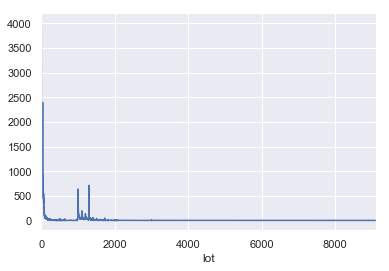

In [200]:
raw_data.groupby('lot').size().plot()
# it reads as numerical, but infact categorical
# can be deleted

In [203]:
raw_data.groupby('easement').size()

# can be deleted

easement
     85973
E        2
dtype: int64

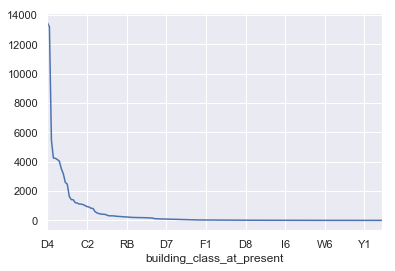

In [446]:
raw_data.groupby('building_class_at_present').size().sort_values(ascending=False).plot()

# raw_data[raw_data.building_class_at_present == 'C2'].groupby('building_class_at_present').size()

# some has +100 items? need domain knowledge to extract a meaningful sense
# building_class_at_present: may be mapped into 3 groups to use later ?
# no white-spaces at the end

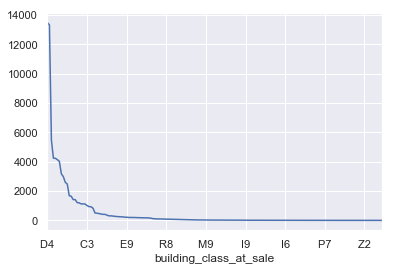

In [219]:
raw_data.groupby('building_class_at_sale').size().sort_values(ascending=False).plot()

In [462]:
raw_data.groupby('apartment_number').size().sort_values(ascending=False).head(10)

# len(raw_data.groupby('apartment_number').size()) 

# raw_data[raw_data.apartment_number == 'TIMES']

# 63830 is empty %74 empty
# 4000+ diff. apartment_number in 85K rows.
# apartment_number has ehite-spaces at the end

apartment_number
         63830
TIMES      599
4          273
3B         249
3A         244
2          235
3          233
6          228
2A         222
4A         219
dtype: int64

In [287]:
raw_data.groupby('zipcode').size().sort_values(ascending=False).head(10)#.plot(kind='pie')

# 10019 zipcode is %7 of houses
# 70K houses in 100 zipcodes

# no double rows

zipcode
10019    6193
10023    1514
11207    1357
11201    1314
10011    1261
11375    1200
10314    1164
10016    1147
10022    1119
11215    1106
dtype: int64

In [505]:
z= raw_data

z.groupby('residential_units').size().sort_values(ascending=False).head(10)

# len(z.groupby('residential_units').size())

# there are double Zewros !! and many lines are double.
# , must be removed
# 165 tyes
# 0 and 1 %50 of houses


residential_units
0     24544
1     20155
2      6538
3      1976
4       531
6       405
8       197
5       157
20      145
10      133
dtype: int64

In [506]:
len(z[z.residential_units.isna()])

29729

In [507]:
len(z[z.commercial_units.isna()])

62392

In [508]:
len(z[z.total_units.isna()])

29729

In [500]:
z.groupby('commercial_units').size().sort_values(ascending=False)
    
# 23 types commercial inits (less than resudential_units)
# 0 has 20K+ 
# groupby dontshow NaN values !!! contains 60K NaN !!!

commercial_units
0      21998
1       1183
2        181
3         80
5         36
4         34
6         14
7         14
9          8
11         7
8          6
10         6
12         3
25         2
56         2
14         2
34         1
18         1
15         1
13         1
100        1
436        1
172        1
dtype: int64

In [512]:
z.groupby('total_units').size().sort_values(ascending=False).head(5)

# 171 types
# 30K naN
# 1 (25K+, 0 (16K+), 2 (8K+)

# total = residental + commercial ?
# if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
# if total = 0 , what we should do?

total_units
1    25994
0    16133
2     8178
3     2289
4      612
dtype: int64

In [518]:
z[['residential_units', 'commercial_units', 'total_units']].head(50)

# total = residental + commercial ?
# if there are dif, can we set to commercial or we should delete  or we may use to create a dummy category ?
# if total = 0 , what we should do?

,residential_units,commercial_units,total_units
0,0,NaN,0
1,0,NaN,0
2,0,NaN,0
3,0,NaN,0
4,0,NaN,0
5,0,NaN,0
6,0,NaN,0
7,0,NaN,0
8,0,NaN,0
9,0,NaN,0


# cross relations

In [519]:
k = raw_data[['building_class_name', 'residential_units']]
# k['len'] = k.building_class_name.str.len()
# k = k[k.building_class_name == 'TWO FAMILY HOMES                        ']


#CONDOS - ELEVATOR APARTMENTS 
k.groupby([ 'building_class_name', 'residential_units']).size()#.sort_values(ascending=False).unstack('residential_units')#.plot(kind='pie')

building_class_name                      residential_units
ASYLUMS AND HOMES                        0                        3
                                         2                        1
                                         40                       1
                                         65                       1
COMMERCIAL CONDOS                        0                     1194
COMMERCIAL GARAGES                       0                      506
                                         1                        5
                                         2                        1
COMMERCIAL VACANT LAND                   0                      253
                                         105                      1
                                         20                       2
                                         9                        2
CONDO-RENTALS                            0                        4
                                         101             

In [520]:
raw_data.describe(include='all')

,borough,borough_name,neighborhood,building_class_category,building_class,building_class_name,tax_class_at_present,tax_class_at_sale,block,lot,easement,building_class_at_present,building_class_at_sale,address,apartment_number,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_date,sale_price,currency
count,85975.000000,85975,85975,85975,81771,81771,85975,85975.0,85975.000000,85975.000000,85975,85975,85975,85975,85975,85975.000000,56246,23583,56246,8.597500e+04,8.597500e+04,85975.000000,85975,8.597500e+04,85975
unique,NaN,5,257,40,39,39,11,8.0,NaN,NaN,2,170,170,63419,4492,NaN,165,23,171,NaN,NaN,NaN,386,NaN,1
top,NaN,Manhattan,MIDTOWN WEST,01 ONE FAMILY HOMES,01,ONE FAMILY HOMES,2,2.0,NaN,NaN,,D4,D4,870 7 AVENUE,,NaN,0,0,1,NaN,NaN,NaN,2012-09-27 00:00:00,NaN,USD
freq,NaN,27395,6264,14846,14846,14846,32899,36960.0,NaN,NaN,85973,13461,13461,2087,63830,NaN,24544,21998,25994,NaN,NaN,NaN,988,NaN,85975
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-26 00:00:00,NaN,NaN
mean,2.723606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3661.041721,405.420541,NaN,NaN,NaN,NaN,NaN,10758.035254,NaN,NaN,NaN,3.085275e+03,5.049742e+03,1681.403303,NaN,8.850979e+05,NaN
std,1.352580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3404.028873,652.166743,NaN,NaN,NaN,NaN,NaN,662.101399,NaN,NaN,NaN,5.501497e+04,2.836546e+04,670.796500,NaN,9.424213e+06,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000e+00,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052.000000,23.000000,NaN,NaN,NaN,NaN,NaN,10028.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1910.000000,NaN,0.000000e+00,NaN
